# Proyek Machine Learning - Water Quality Classification


Dataset yang digunakan dalam proyek _machine learning_ ini adalah "Water Quality and Potability," yang tersedia di platform [Kaggle](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability). _Dataset_ ini merupakan kumpulan data kuantitatif yang mencakup berbagai kolom untuk menentukan apakah air layak diminum atau tidak. Secara keseluruhan, dataset ini terdiri dari 3276 baris dan 10 kolom.

Dataset_ ini sangat sesuai untuk membangun model _supervised learning_, khususnya untuk tugas _binary classification_. Dalam konteks ini, model akan digunakan untuk mengklasifikasikan sampel air menjadi dua kategori: layak diminum atau tidak layak diminum

# Data Diri

- Nama : Royan Sabila Rosyad W
- Id Dicoding : royanrosyad85
- Institusi : UIN Syarif Hidayatullah Jakarta


# Importing Library

In [47]:
# Meng-import semua library yang digunakan
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score, roc_curve, auc
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline

# Importing Dataset

In [2]:
# Upload kaggle.json yang didapatkan dari akun Kaggle
from google.colab import files
files.upload()  # Pilih file kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"royanrosyad","key":"07dc230269fe3ab8a8f04e649e7b0d3d"}'}

In [3]:
# Buat direktori dan ubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d devanshibavaria/water-potability-dataset-with-10-parameteres

# Unzip dataset dan hapus file zip
!unzip water-potability-dataset-with-10-parameteres.zip

Dataset URL: https://www.kaggle.com/datasets/devanshibavaria/water-potability-dataset-with-10-parameteres
License(s): CC0-1.0
Archive:  water-potability-dataset-with-10-parameteres.zip
  inflating: water_potability.csv    


Dataset sudah diimport dan sudah diekstrak

In [4]:
# Membuat dataset menjadi dataframe dengan nama 'dataset'
df = pd.read_csv('//content//water_potability.csv')

In [5]:
# Preview dataframe dari dataset yang sudah dibuat
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

## Understand And Organize the Dataset

Berikut ini adalah informasi lainnya mengenai variabel-variabel yang terdapat di dataset tersebut:

Variabel-variabel pada _Dataset "Water Quality and Potability"_ adalah sebagai berikut:
- ```pH```: Tingkat pH air.
- ```Hardness```: Ukuran kandungan mineral.
- ```Solids```: Total padatan terlarut dalam air.
- ```Chloramines```: Konsentrasi kloramin dalam air.
- ```Sulfate```: Konsentrasi sulfat dalam air.
- ```Conductivity```: Konduktivitas listrik di air.
- ```Organic_carbon```: Kandungan karbon organik dalam air.
- ```Trihalomethanes```: Konsentrasi trihalometan dalam air.
- ```Turbidity```: Tingkat kekeruhan, ukuran kejernihan air.
- ```Potability```: Variabel target. menunjukkan potabilitas air dengan nilai 1 (layak minum) dan 0 (tidak layak minum).


Exploratory Data Analysis (EDA) adalah pendekatan analisis data yang bertujuan untuk memahami karakteristik utama dari kumpulan data. EDA melibatkan penggunaan teknik statistik dan visualisasi grafis untuk menemukan pola, hubungan, atau anomali untuk membentuk hipotesis. Proses ini sering kali tidak terstruktur dan dianggap sebagai langkah awal penting dalam analisis data yang membantu menentukan arah analisis lebih lanjut.

In [6]:
# Menjumlah total missing value pada dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Berdasarkan output diatas, terdapat 3 kolom yang memiliki missing value dengan jumlah yang berbeda. Kolom tersebut yaitu:
- ```ph```
- ```Sulfate```
- ```Trihalomethanes```

Jumlah missing value dalam kumpulan data ini terlalu banyak. Daripada menghapusnya, pendekatan yang lebih masuk akal adalah menggantinya dengan nilai median, sehingga data tetap lebih representatif dan tidak kehilangan informasi penting.

In [7]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
# Menampilan jumlah baris dan kolom yang ada pada dataset

df.shape

(3276, 10)

Berdasarkan output diatas, didapatkan informasi:
  - Terdapat 3276 baris data
  - Tedapat 10 kolom

In [9]:
# Menampilkan kolom-kolom yang ada pada dataset

df.keys()

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Berdasarkan output diatas, didapatkan informasi:

Dataset memiliki 10 kolom, yaitu 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'

 terdiri dari 1 kolom label ("Potability") 9 kolom feature (sisanya selain kolom label)

In [10]:
# Menampilkan tipe data dari setiap kolom yang ada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Berdasarkan hasil diatas, didatkan informasi:
- Kolom ```Potability``` memiliki tipe data ```int64```
- Kolom lainnya memiliki tipe data ```float64```

In [11]:
# Menampilkan statistika deskriptif unuk setiap kolom

df.describe().T

count          mean          std         min           25%  \
ph               3276.0      7.074194     1.470040    0.000000      6.277673   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          3276.0    333.608364    36.143851  129.000000    317.094638   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3276.0     66.407478    15.769958    0.738000     56.647656   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      7.870050     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    350.385756    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     76.666609    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

Fungsi diatas memberikan informasi statistika deskriptif untuk setiap kolom yang ada, yaitu:
- ```count``` : Jumlah data dari sebuah kolom
- ```mean``` : Rata-rata dari sebuah kolom
- ```std``` : Standar deviasi dari sebuah kolom
- ```min``` : Nilai terendah pada sebuah kolom
- ```25%``` : Nilai kuartil pertama (Q1) dari sebuah kolom
- ```50%``` : Nilai kuartil kedua (Q2) atau median atau nilai tengah dari sebuah kolom
- ```75%``` : Nilai kuartil ketiha (Q3) dari sebuah kolom
- ```max``` : Nilai tertinggi pada sebuah kolom

In [12]:
# Cek baris duplikat dalam df
duplicates = df.duplicated()

# Hitung jumlah baris duplikat
duplicate_count = duplicates.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah pendekatan dalam analisis data yang bertujuan untuk menggali dan memahami karakteristik utama dari sebuah dataset. EDA memanfaatkan teknik statistik dan visualisasi grafis untuk mengungkap pola, hubungan, atau anomali dalam data. Hasil dari proses ini dapat digunakan untuk menyusun hipotesis dan sering kali menjadi langkah awal yang krusial dalam analisis data untuk menentukan arah penelitian selanjutnya.

### Univariate Analysis


Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel (atau bidang data) pada satu waktu. Tujuannya adalah untuk menggambarkan data dan menemukan pola yang ada dalam distribusi variabel tersebut. Ini termasuk penggunaan statistik deskriptif, histogram, dan box plots untuk menganalisis distribusi dan memahami sifat dari variabel tersebut.

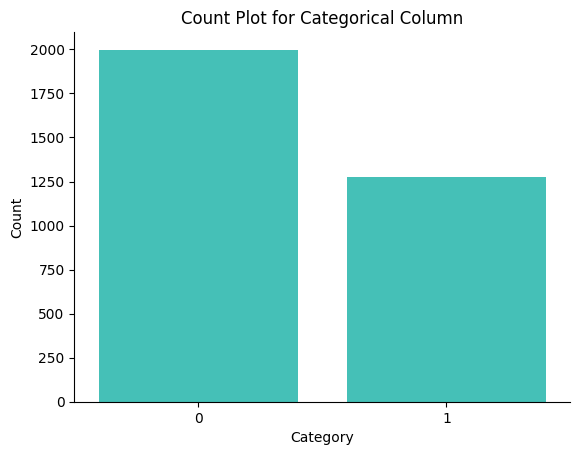

In [13]:
# Membuat count plot
sns.countplot(x='Potability', data=df, color='#30D5C8')
sns.despine()
plt.title('Count Plot for Categorical Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Berdasarkan *count_plot* diatas, didapatkan informasi bahwa:
- kelas `0` pada label `Potability` memiliki nyaris 2000 data.
- kelas `1` pada label `Potability` hanya memiliki sekitar 1250 data.

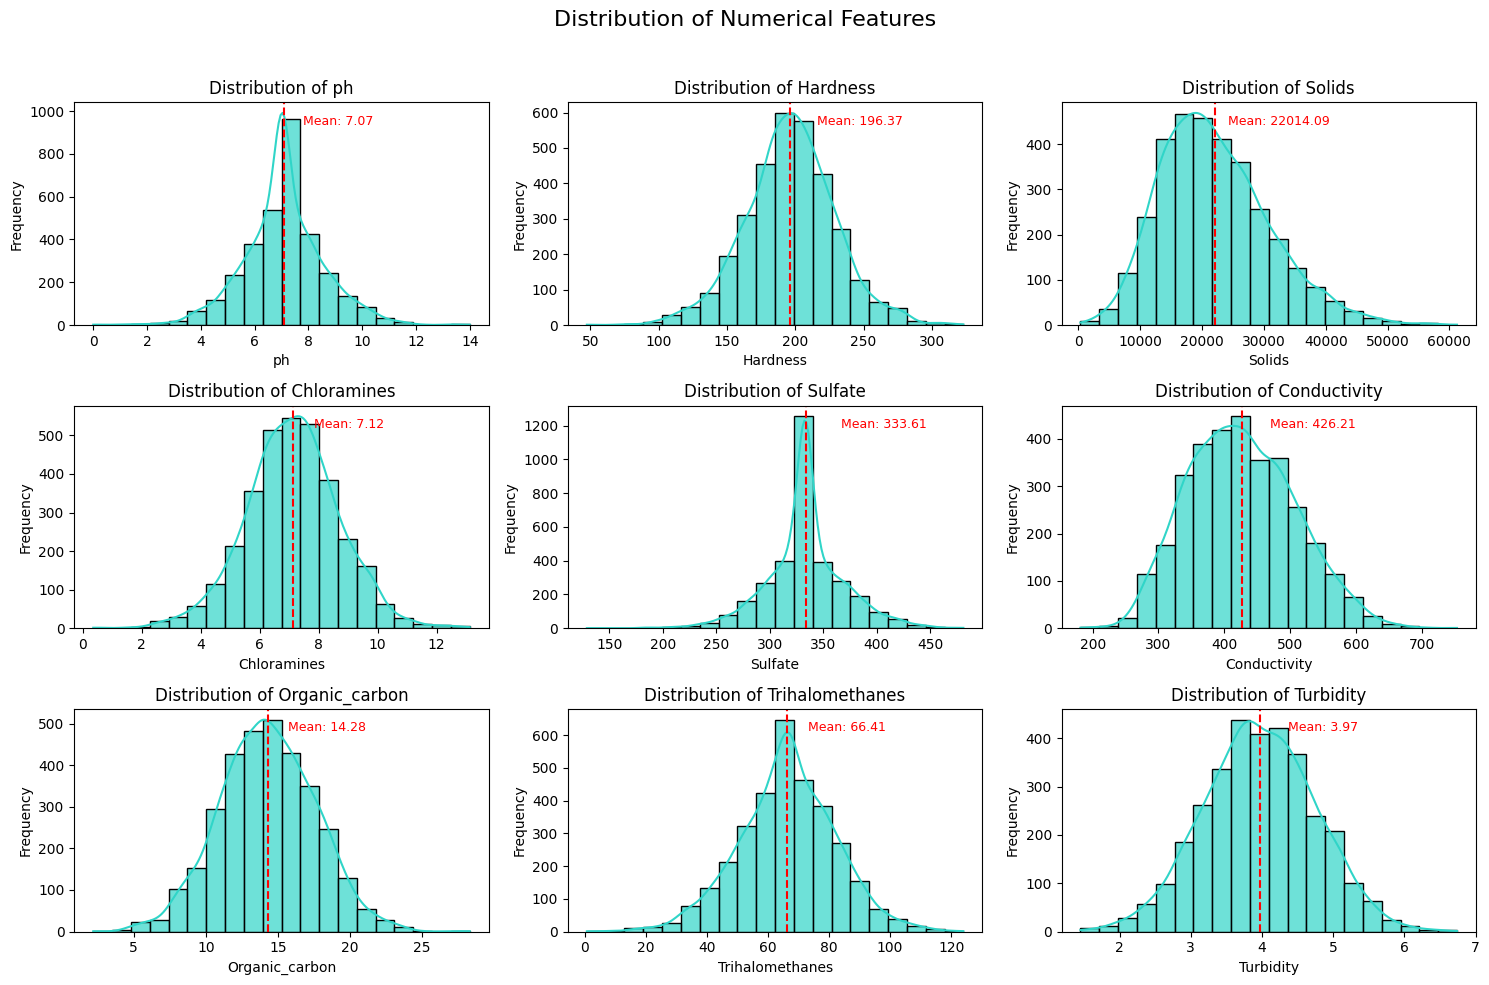

In [14]:
# Create a more refined visualization for numerical features
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns[:9]):  # Only take up to 9 columns to fit the grid
    sns.histplot(df[column], bins=20, kde=True, color='#30D5C8', ax=axs[i], alpha=0.7)
    axs[i].set_title(f'Distribution of {column}', fontsize=12)
    axs[i].set_xlabel(column, fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)

    # Add mean line
    mean_val = df[column].mean()
    axs[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
    axs[i].text(mean_val*1.1, axs[i].get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}',
                color='red', fontsize=9)

# Remove unused subplots if any
for i in range(len(numerical_columns[:9]), len(axs)):
    fig.delaxes(axs[i])

plt.suptitle('Distribution of Numerical Features', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Berdasarkan visualisasi diatas, gambar ini menampilkan setiap kolom numerik yang ada pada dataset, seperti ```pH```, ```Hardness```, ```Solids```, ```Chrolamines```, ```Sulfate```, ```Conductivity```, ```Organic_carbon```, ```Trihalomethanes```, ```Turbidity```. Dari semua kolom yang ditampilkan, hanya kolom ```Solids``` dan ```Conductivity``` yang memiliki skewness ke arah kiri.

### Box Plots

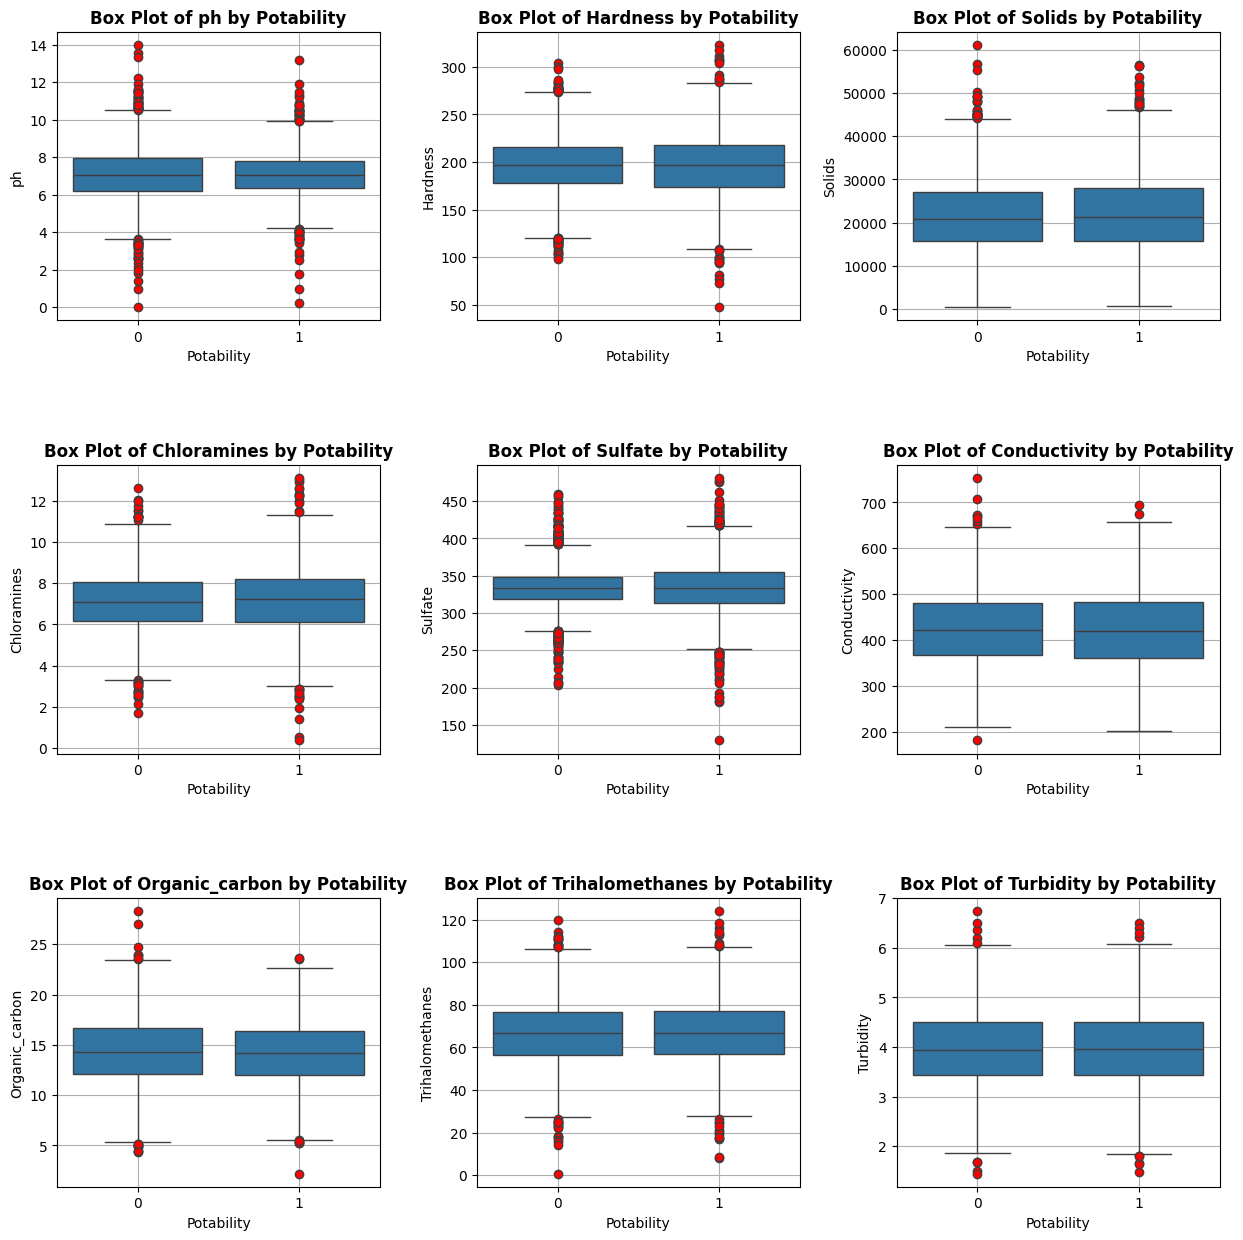

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(df.columns[:-1]): #potability column except
    row = i // 3
    col_idx = i % 3

    sns.boxplot(data=df, x='Potability', y=col, ax=ax[row, col_idx],
                flierprops=dict(markerfacecolor='red', marker='o'))
    ax[row, col_idx].set_title(f'Box Plot of {col} by Potability', fontweight='bold')
    ax[row, col_idx].grid(True)

plt.show()

Box plot ini memvisualisasikan distribusi setiap fitur numerik (seperti pH, Hardness, Solids, dll.) yang dipisahkan berdasarkan kelas Potability (0: Tidak Layak Minum, 1: Layak Minum). Titik-titik merah menunjukkan adanya outliers (pencilan) pada hampir semua fitur untuk kedua kelas. Secara umum, distribusi (median, rentang interkuartil, dan sebaran data) untuk air yang layak minum (1) dan tidak layak minum (0) tampak sangat mirip di sebagian besar fitur, menunjukkan bahwa tidak ada satu fitur pun yang secara individual memiliki perbedaan distribusi yang jelas antara kedua kelas, yang mengindikasikan hubungan yang lemah antara masing-masing fitur ini dengan kelayakan minum air.

### Correlation Between Numerical Variables

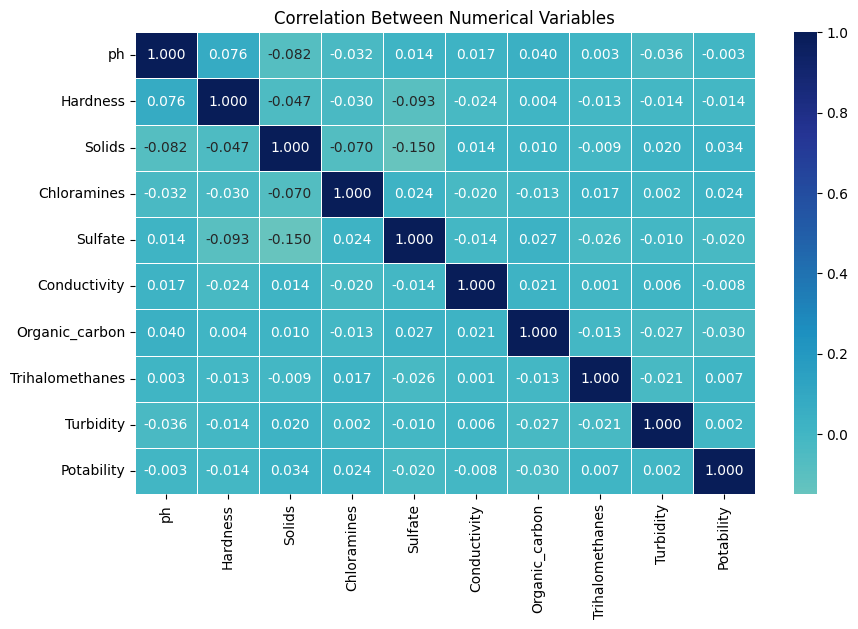

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', center=0, linewidths=0.5, linecolor='white', fmt='.3f')
plt.title('Correlation Between Numerical Variables')
plt.show()

Heatmap korelasi ini menampilkan koefisien korelasi Pearson antar variabel numerik, dengan warna biru tua menandakan korelasi positif yang lebih kuat dan warna terang menunjukkan korelasi lemah atau negatif. Secara keseluruhan, hubungan linier antar fitur tampak lemah, dengan korelasi terkuat yang teramati hanya -0.150 antara Sulfate dan Solids. Variabel target Potability juga menunjukkan korelasi yang sangat rendah dengan semua fitur lainnya, mengimplikasikan bahwa hubungan non-linier atau interaksi antar fitur kemungkinan lebih berperan dalam menentukan kelayakan minum air, sehingga mendukung penggunaan model yang lebih kompleks.

### Multivariate Analysis

_Multivariate Analysis_ adalah prosedur statistik yang digunakan untuk memeriksa hubungan antara beberapa variabel secara bersamaan. Teknik ini mencakup berbagai metode seperti regresi berganda, analisis faktor, dan analisis kluster, yang membantu dalam memahami struktur dan pola yang kompleks dalam data dengan lebih dari satu variabel.

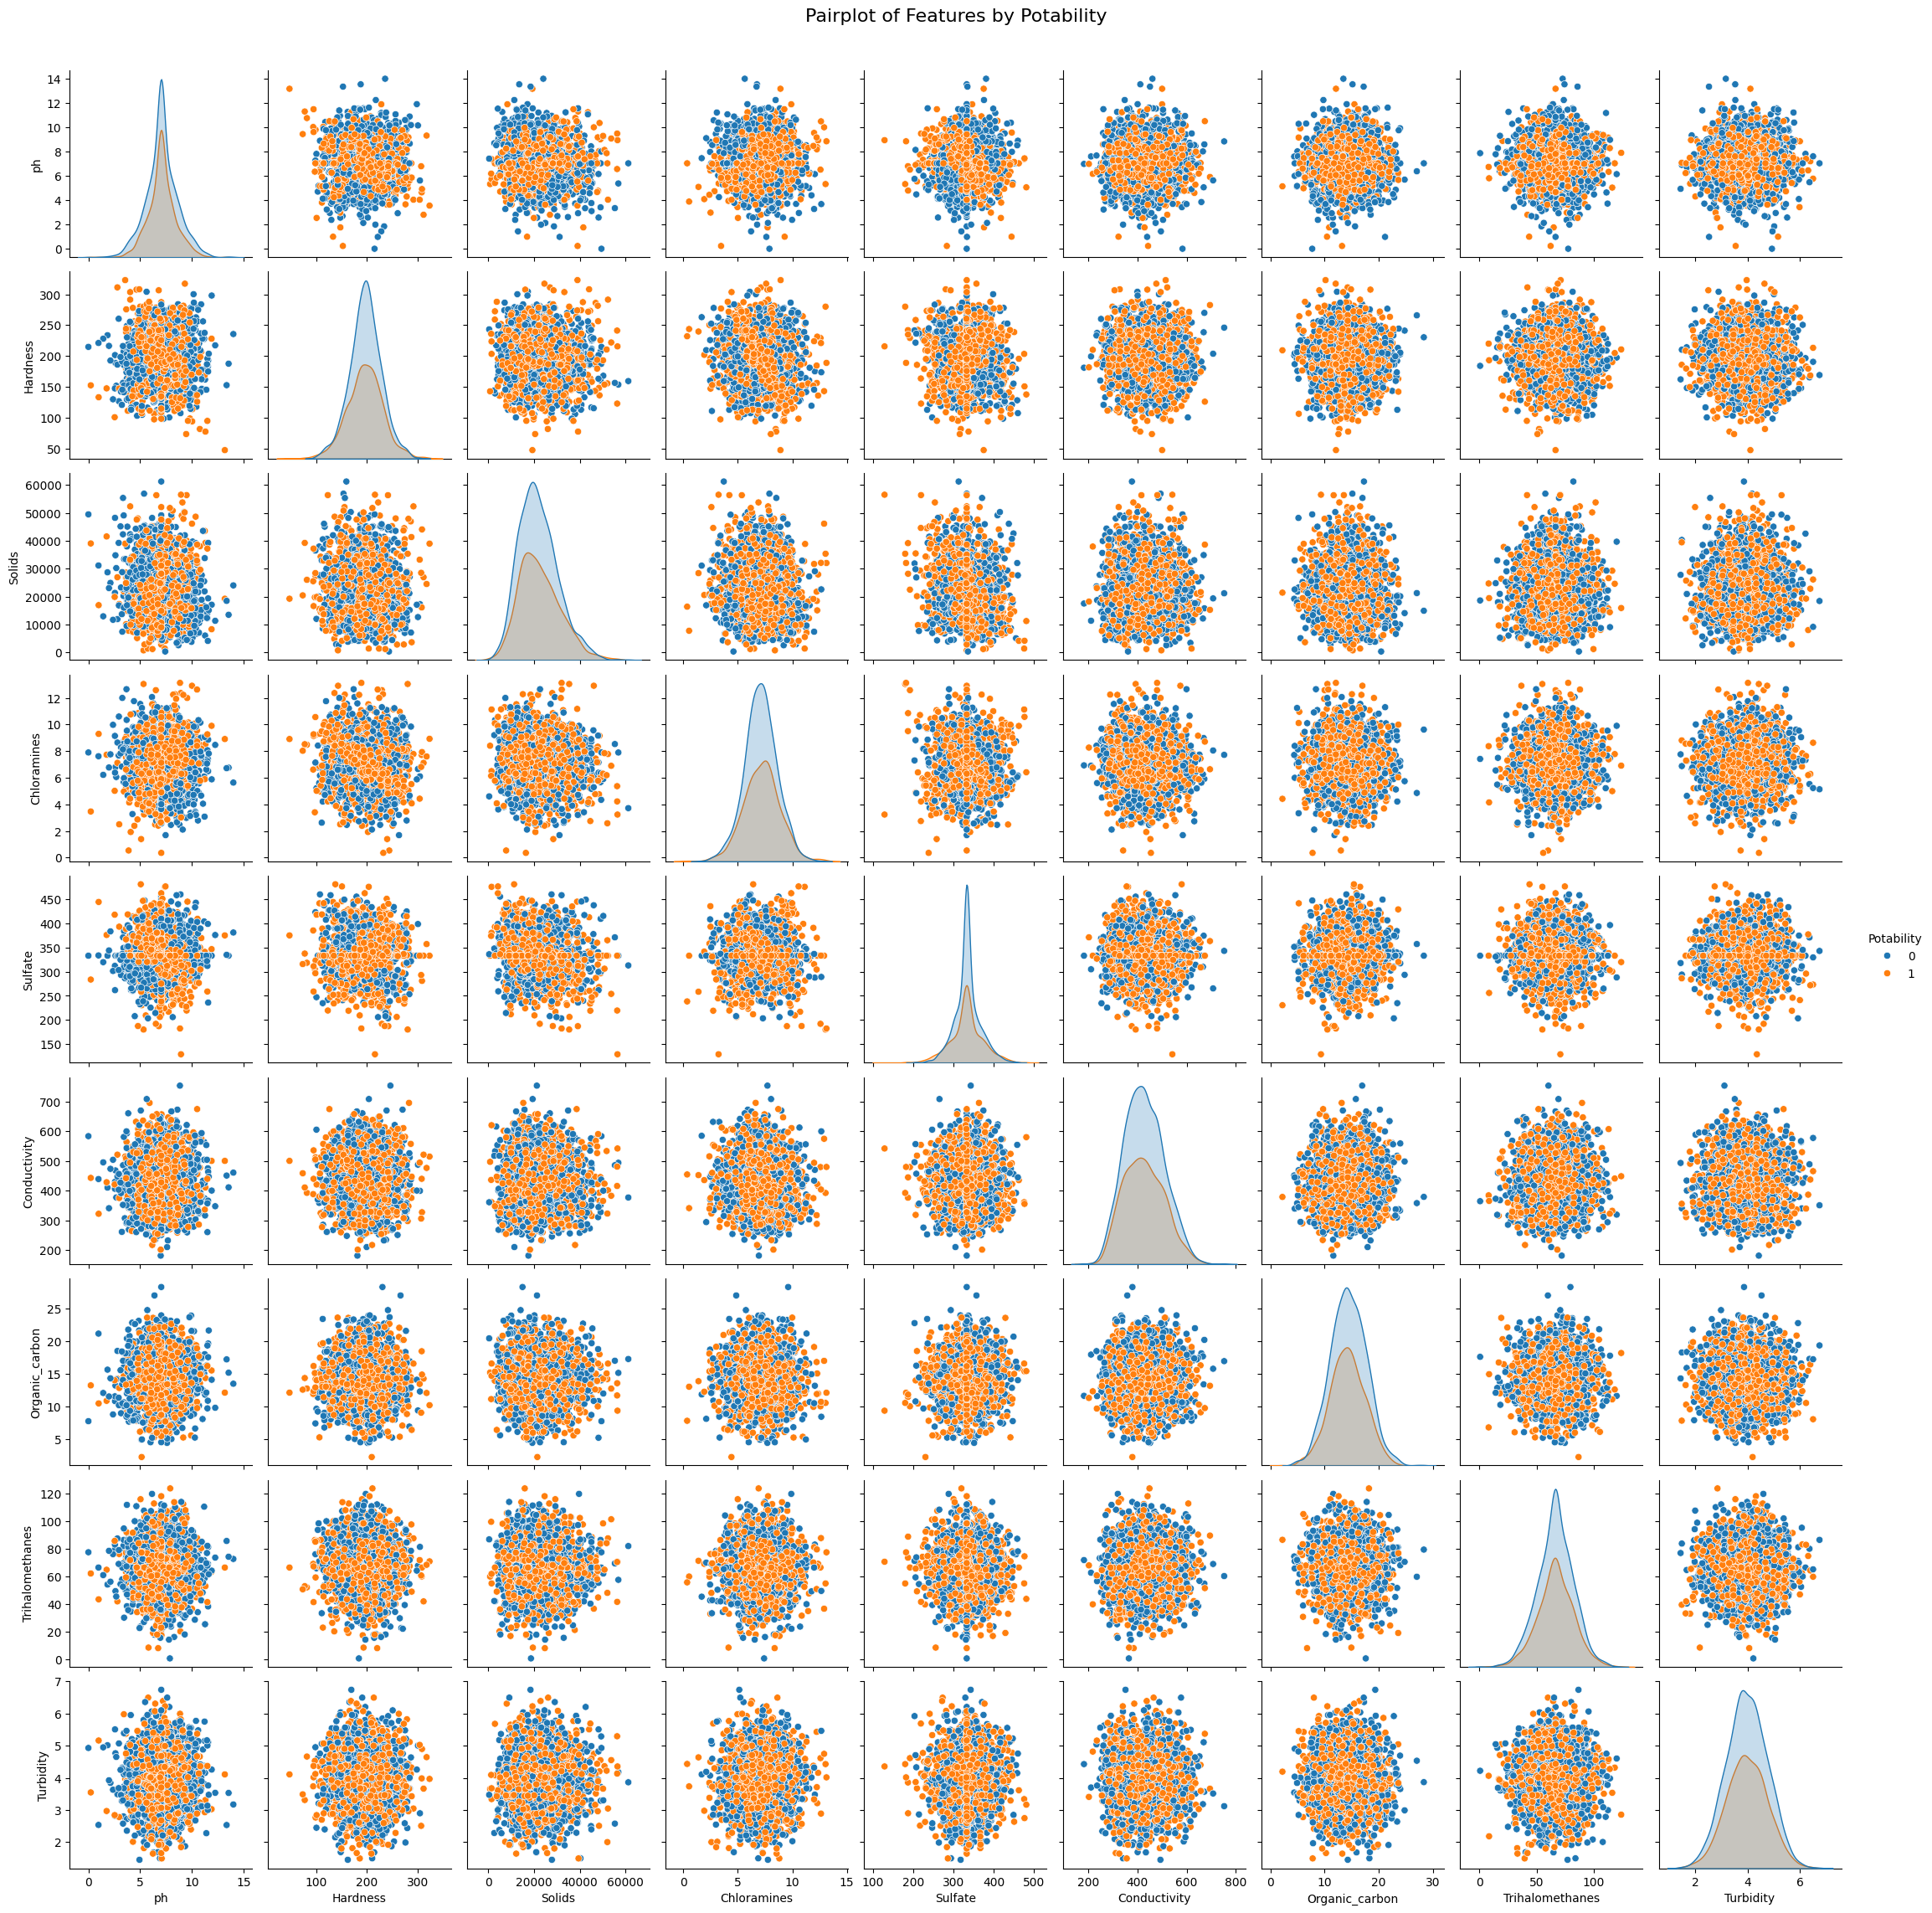

In [17]:
sns.pairplot(df, diag_kind='kde', hue='Potability', height=2.5)
plt.suptitle('Pairplot of Features by Potability', y=1.02, fontsize=16)
plt.show()

Berdasarkan hasil visualisasi di atas, tampak bahwa hampir semua variabel terdistribusi di sekitar nilai tengah dan tidak memperlihatkan pola atau karakteristik khusus terhadap variabel label, yaitu ```'Potability'```. Bahkan pada visualisasi tersebut meskipun data telah dipisahkan berdasarkan kategori ```0``` dan ```1``` (dengan warna biru dan oranye), tetap tidak ditemukan pola atau ciri khas tertentu pada masing-masing nilai label. Hal ini menunjukkan bahwa hubungan antar fitur, termasuk dengan variabel label, cenderung lemah atau berkorelasi rendah.


### Correlation

Uji Korelasi adalah metode statistik yang digunakan untuk menentukan apakah ada hubungan antara dua variabel kuantitatif dan seberapa kuat hubungan tersebut. Uji ini menghasilkan nilai koefisien korelasi, seperti Pearson atau Spearman, yang berkisar antara -1 hingga +1. Nilai mendekati +1 menunjukkan korelasi positif yang kuat, sedangkan nilai mendekati -1 menunjukkan korelasi negatif yang kuat. Nilai mendekati 0 menunjukkan tidak adanya korelasi. Uji korelasi penting dalam menentukan arah dan kekuatan hubungan antar variabel, yang dapat membantu dalam pemodelan prediktif dan analisis penyebab.

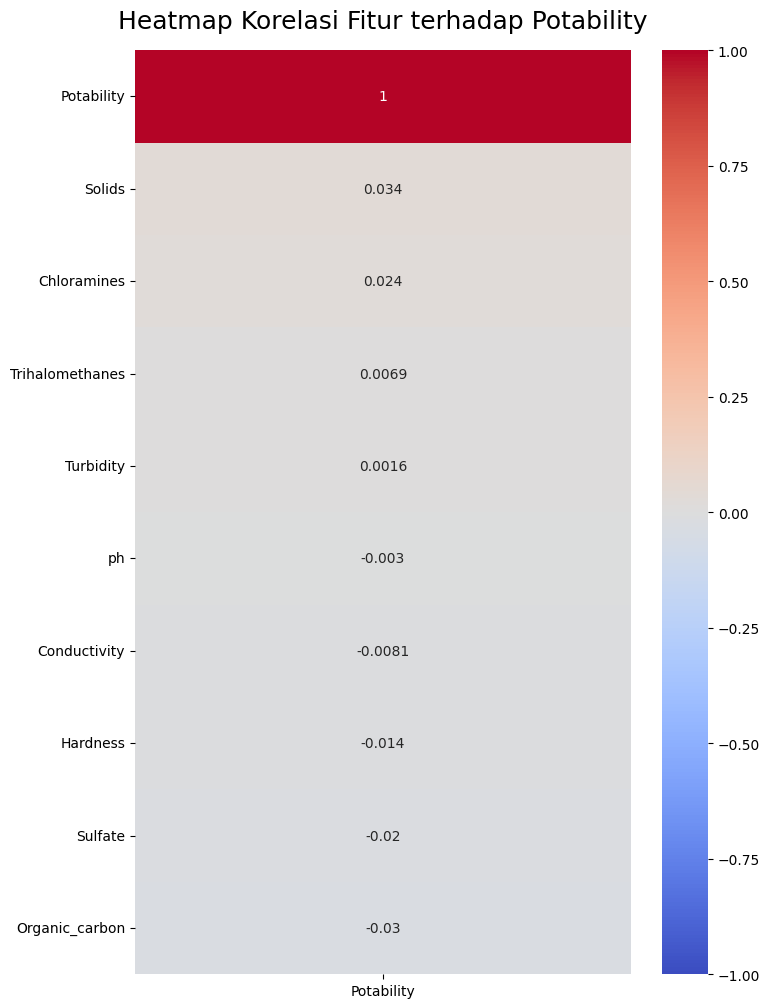

In [18]:
# Visualisasi korelasi antara fitur numerik dan label Potability

plt.figure(figsize=(8, 12))
corr_matrix = df.corr()[['Potability']].sort_values(by='Potability', ascending=False)
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
ax.set_title('Heatmap Korelasi Fitur terhadap Potability', fontsize=18, pad=16)
plt.show()

Berdasarkan  visualisasi diatas, terlihat bahwa kolom ```pH```, ```Conductivity```, ```Trihalomethanes```, ```Turbidity``` memiliki skor korelasi yang paling kecil terhadap label. Kolom yang semacam ini baiknya di-drop saja untuk meringankan beban komputasi dan mengurangi dimensi dari dataset yang akan digunakan dalam pelatihan model

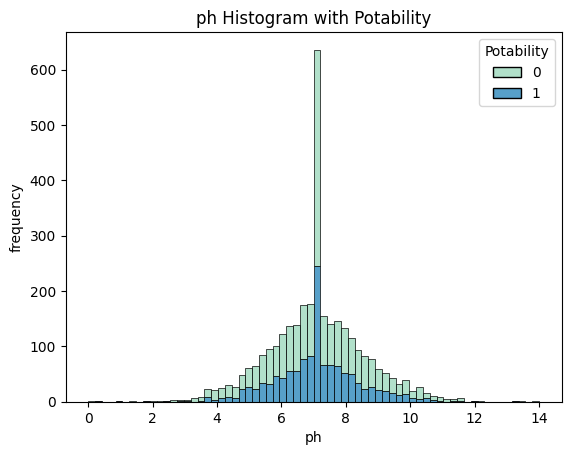

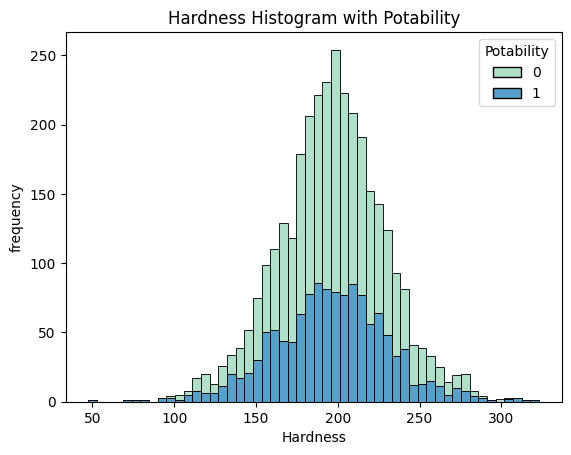

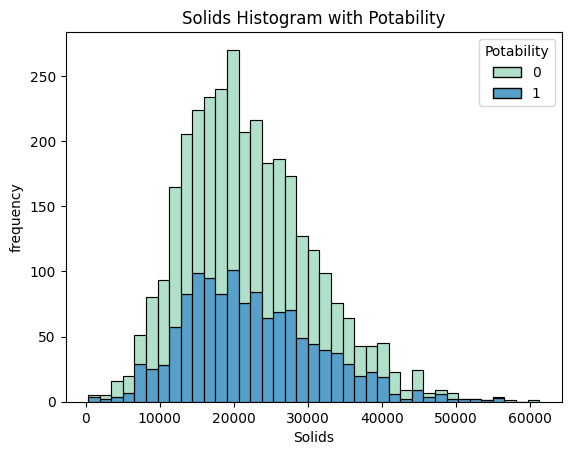

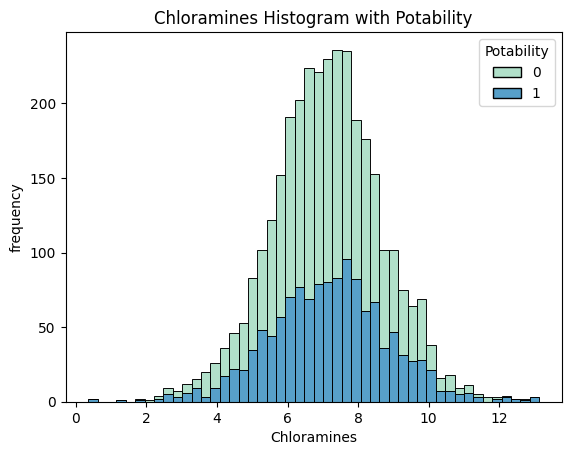

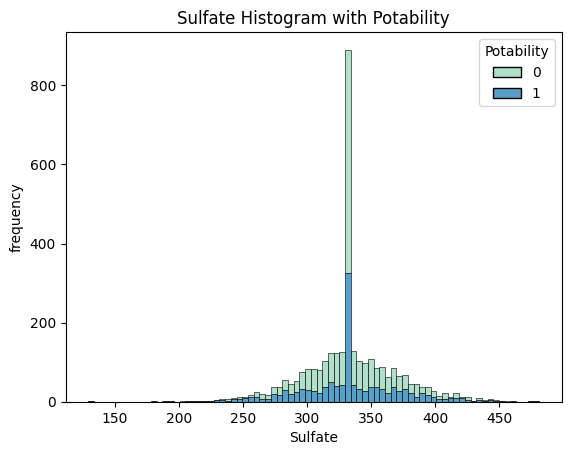

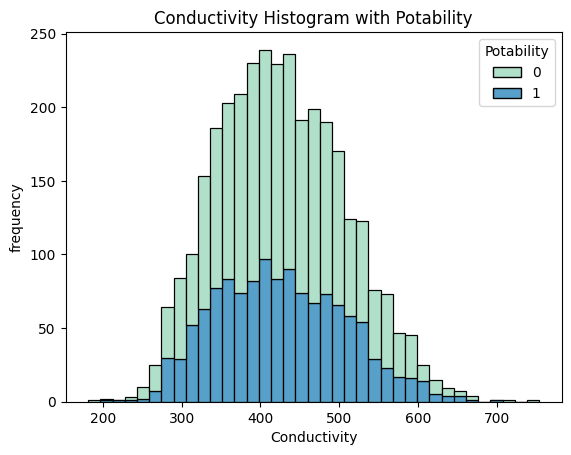

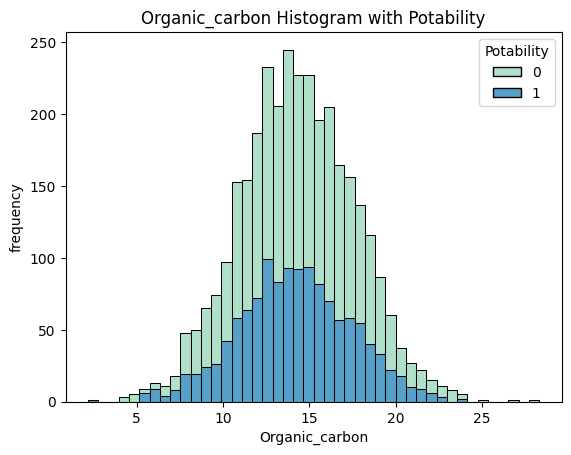

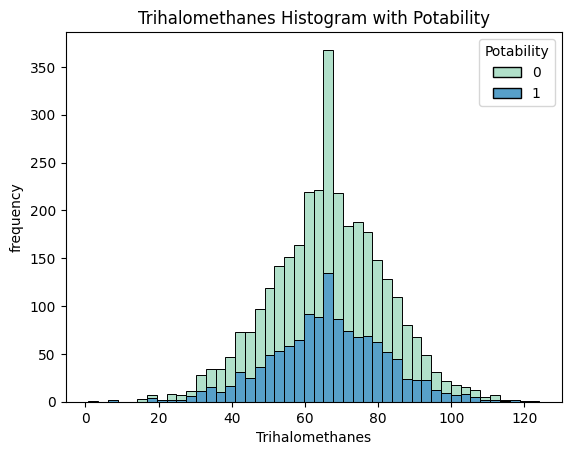

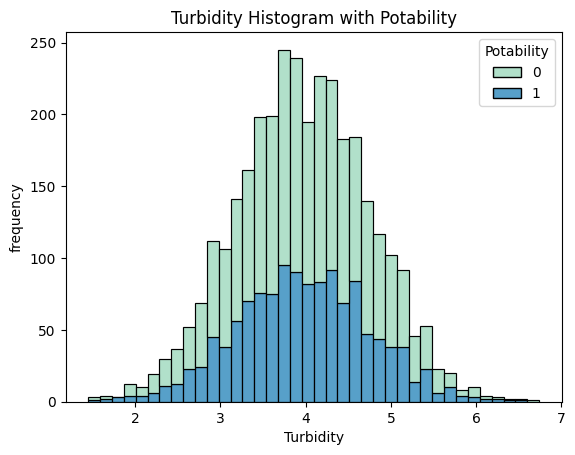

In [19]:
for num_row in df.columns[:-1]:
    sns.histplot(data=df,x=num_row,hue='Potability', multiple="stack",palette="YlGnBu",)
    plt.title(f"{num_row} Histogram with Potability")
    plt.xlabel(f"{num_row}")
    plt.ylabel("frequency")
    plt.show()

# Data Preparation

### Oversampling to Handle Imbalanced Data

Oversampling adalah teknik yang digunakan untuk menangani masalah ketidakseimbangan kelas dalam dataset. Ketidakseimbangan ini terjadi ketika jumlah data pada satu kelas jauh lebih sedikit dibandingkan kelas lainnya, yang dapat menyebabkan model menjadi bias terhadap kelas mayoritas. Dalam oversampling, data dari kelas minoritas ditambahkan secara sintetis atau diduplikasi hingga jumlahnya seimbang dengan kelas mayoritas. Salah satu metode populer adalah RandomOverSampler, yang menduplikasi data kelas minoritas secara acak, atau SMOTE, yang menciptakan sampel sintetis berdasarkan interpolasi data kelas minoritas.


In [24]:
# Memisahkan fitur dan target
x = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Melihat distribusi kelas awal
count_0 = np.sum(y == 0)
count_1 = np.sum(y == 1)
print("Sebelum oversampling:")
print(f"Jumlah baris data yang bernilai '0' ada sebanyak: {count_0}")
print(f"Jumlah baris data yang bernilai '1' ada sebanyak: {count_1}")
print(f"Persentase kelas 0: {count_0/(count_0+count_1)*100:.2f}%")
print(f"Persentase kelas 1: {count_1/(count_0+count_1)*100:.2f}%")

Sebelum oversampling:
Jumlah baris data yang bernilai '0' ada sebanyak: 1998
Jumlah baris data yang bernilai '1' ada sebanyak: 1278
Persentase kelas 0: 60.99%
Persentase kelas 1: 39.01%


In [25]:
# Over-sampling dengan keseimbangan penuh
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = over_sampler.fit_resample(x, y)

# Melihat distribusi kelas setelah oversampling
count_0 = np.sum(y_resampled == 0)
count_1 = np.sum(y_resampled == 1)
print("\nSetelah oversampling:")
print(f"Jumlah baris data yang bernilai '0' ada sebanyak: {count_0}")
print(f"Jumlah baris data yang bernilai '1' ada sebanyak: {count_1}")
print(f"Persentase kelas 0: {count_0/(count_0+count_1)*100:.2f}%")
print(f"Persentase kelas 1: {count_1/(count_0+count_1)*100:.2f}%")


Setelah oversampling:
Jumlah baris data yang bernilai '0' ada sebanyak: 1998
Jumlah baris data yang bernilai '1' ada sebanyak: 1998
Persentase kelas 0: 50.00%
Persentase kelas 1: 50.00%


Dataset kini memiliki distribusi yang seimbang, dengan masing-masing kelas memiliki jumlah data yang sama (50% untuk kelas 0 dan 50% untuk kelas 1).
Dengan distribusi yang seimbang, model diharapkan dapat memberikan prediksi yang lebih adil dan tidak bias terhadap salah satu kelas.

In [ ]:
# Scaling fitur setelah oversampling
scaler = MinMaxScaler((-1, 1))x_resampled = scaler.fit_transform(x_resampled)

Scaling fitur adalah langkah penting dalam machine learning, terutama untuk algoritma yang sensitif terhadap skala data (misalnya, KNN, SVM). Setelah oversampling, scaling dengan MinMaxScaler dalam rentang (-1, 1) memberikan manfaat berikut:

- **Normalisasi**: Menyamakan skala semua fitur agar tidak ada fitur yang mendominasi.
- **Konvergensi Lebih Cepat**: Mempercepat proses optimasi pada algoritma berbasis gradien.
- **Konsistensi**: Memastikan data asli dan sintetis memiliki skala yang sama.

Langkah ini penting untuk menjaga kualitas data setelah oversampling.


### Modelling

Dengan pendekatan machine learning

In [28]:
parameters = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100,150, 170,200,230,250,300]
    },

    'KNeighborsClassifier': {
        'n_neighbors': [3,5,7,10,15,20,30],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

    'XGBClassifier': {
        'learning_rate': [0.001,0.01, 0.1, 0.5,1],
        'n_estimators': [50, 100,150, 200,250,350,300,350]
    }
}

Parameter grid didefinisikan untuk beberapa algoritma seperti RandomForestClassifier, KNeighborsClassifier, dan XGBClassifier. Parameter ini digunakan untuk mencari kombinasi terbaik melalui proses Grid Search.

In [29]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier()
}

Model-model yang akan diuji didefinisikan dalam dictionary, seperti RandomForestClassifier, KNeighborsClassifier, dan XGBClassifier

In [30]:
results =list()
for model_name, model in models.items():
    print(f"Grid searching for {model_name}")
    param_grid = parameters[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
    grid_search.fit(x_resampled,y_resampled)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    results.append({'Model': model_name, 'Best Params': best_params, 'Best Accuracy': best_accuracy})
results_df = pd.DataFrame(results)

Grid searching for RandomForestClassifier
Grid searching for KNeighborsClassifier
Grid searching for XGBClassifier


Grid Search untuk Hyperparameter Tuning:
- Proses Grid Search dilakukan untuk mencari kombinasi parameter terbaik untuk setiap model. 
- Proses ini menggunakan validasi silang (cv=4) dan metrik evaluasi berupa akurasi (scoring='accuracy')

In [ ]:
results_df.head(3)

Model                                        Best Params  \
0  RandomForestClassifier                              {'n_estimators': 150}   
1    KNeighborsClassifier  {'metric': 'euclidean', 'n_neighbors': 30, 'we...   
2           XGBClassifier        {'learning_rate': 0.5, 'n_estimators': 300}   

   Best Accuracy  
0       0.729229  
1       0.696446  
2       0.714214

Evaluasi Model dengan Cross-Validation

In [33]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=150),
    'KNeighborsClassifier': KNeighborsClassifier(metric='euclidean',n_neighbors=30,weights='distance'),
    'XGBClassifier': XGBClassifier(learning_rate=0.1,n_estimators=250)
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

scores = []
for model_name, model in models.items():
    print("-" * 50)
    print(f'{model_name}:')

    # Perform cross-validation
    cv_results = cross_validate(model, x, y, cv=4, scoring=scoring)

    # Collect and display the results
    accuracy = np.mean(cv_results['test_accuracy'])
    precision = np.mean(cv_results['test_precision'])
    recall = np.mean(cv_results['test_recall'])
    f1 = np.mean(cv_results['test_f1'])

    # Tampilkan hasil untuk model saat ini
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Collect the results for DataFrame
    model_results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }
    scores.append(model_results)

# Create DataFrame from results
scores_df = pd.DataFrame(scores)

# Tampilkan hasil dalam bentuk DataFrame terformat
print("\n" + "="*50)
print("RINGKASAN HASIL EVALUASI MODEL:")
print("="*50)
print(scores_df.set_index('Model').round(4))

--------------------------------------------------
RandomForestClassifier:
Accuracy: 0.6053
Precision: 0.5065
Recall: 0.2668
F1 Score: 0.3469
--------------------------------------------------
KNeighborsClassifier:
Accuracy: 0.5955
Precision: 0.4460
Recall: 0.1542
F1 Score: 0.2288
--------------------------------------------------
XGBClassifier:
Accuracy: 0.5742
Precision: 0.4461
Recall: 0.3326
F1 Score: 0.3795

RINGKASAN HASIL EVALUASI MODEL:
                        Accuracy  Precision  Recall      F1
Model                                                      
RandomForestClassifier    0.6053     0.5065  0.2668  0.3469
KNeighborsClassifier      0.5955     0.4460  0.1542  0.2288
XGBClassifier             0.5742     0.4461  0.3326  0.3795


### Evaluasi Model dengan Cross-Validation

Pada tahap ini, dilakukan evaluasi terhadap beberapa model menggunakan teknik **Cross-Validation**. Berikut adalah langkah-langkah yang dilakukan:

**Definisi Model**  
   - Tiga model yang dievaluasi adalah:
     - `RandomForestClassifier` dengan `n_estimators=150`
     - `KNeighborsClassifier` dengan `metric='euclidean'`, `n_neighbors=30`, dan `weights='distance'`
     - `XGBClassifier` dengan `learning_rate=0.1` dan `n_estimators=250`

**Definisi Metrik Evaluasi**  
   - Metrik yang digunakan untuk mengevaluasi performa model adalah:
     - **Accuracy**: Proporsi prediksi yang benar terhadap total data.
     - **Precision**: Proporsi prediksi positif yang benar terhadap total prediksi positif.
     - **Recall**: Proporsi prediksi positif yang benar terhadap total data positif sebenarnya.
     - **F1 Score**: Harmonik rata-rata antara Precision dan Recall.

**Cross-Validation**  
   - Dilakukan **4-fold Cross-Validation** untuk setiap model. Data dibagi menjadi 4 bagian, di mana 3 bagian digunakan untuk pelatihan dan 1 bagian untuk pengujian, secara bergantian.

**Kesimpulan**:  
   Dari hasil evaluasi, model `RandomForestClassifier` memiliki performa terbaik berdasarkan metrik **Accuracy** (60.53%) dibandingkan model lainnya.

In [34]:
scores_df.head(3)

Model  Accuracy  Precision    Recall        F1
0  RandomForestClassifier  0.605311   0.506488  0.266776  0.346861
1    KNeighborsClassifier  0.595543   0.445990  0.154166  0.228843
2           XGBClassifier  0.574176   0.446110  0.332563  0.379503

## Pendekatan Deep Learning

Membangun Kompilasi Model 

In [ ]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.weights.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# Define the input layer
input_layer = Input(shape=(9,))
layer_1=Dense(64,activation='relu')(input_layer)
layer_2=Dense(64,activation='relu')(layer_1)
layer_3=Dense(64,activation='relu')(layer_2)
layer_4=Dropout(0.2)(layer_3)
layer_5=Dense(16,activation='relu')(layer_4)
output_layer=Dense(1,activation='sigmoid')(layer_5)
model=Model(inputs=input_layer,outputs=output_layer)

model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy','precision', 'recall']
)

Pada tahap ini, model deep learning didefinisikan menggunakan **Keras Functional API**. Berikut adalah arsitektur model yang digunakan:
- **Input Layer**: Menerima input dengan dimensi `(9,)`, sesuai dengan jumlah fitur pada dataset.
- **Hidden Layers**:
  - Tiga hidden layer pertama menggunakan **Dense Layer** dengan 64 neuron dan fungsi aktivasi `ReLU`.
  - Satu **Dropout Layer** dengan rate 0.2 untuk mencegah overfitting.
  - Satu hidden layer tambahan dengan 16 neuron dan fungsi aktivasi `ReLU`.
- **Output Layer**: Menggunakan **Dense Layer** dengan 1 neuron dan fungsi aktivasi `Sigmoid` untuk menghasilkan output probabilitas (karena ini adalah masalah binary classification).

#### Proses Training Model

In [36]:
history=model.fit(
    x_resampled, y_resampled,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    verbose=1,
    callbacks=[checkpoint_callback]
)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6149 - loss: 0.6756 - precision: 0.4145 - recall: 0.0594

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.6150 - loss: 0.6755 - precision: 0.4145 - recall: 0.0586 - val_accuracy: 0.0000e+00 - val_loss: 0.9725 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
42/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.6598 - precision: 0.6270 - recall: 0.0033    

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6215 - loss: 0.6590 - precision: 0.6784 - recall: 0.0060 - val_accuracy: 0.0188 - val_loss: 1.0595 - val_precision: 1.0000 - val_recall: 0.0188
Epoch 3/200
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6389 - loss: 0.6470 - precision: 0.8275 - recall: 0.0635

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6401 - loss: 0.6463 - precision: 0.8100 - recall: 0.0678 - val_accuracy: 0.2150 - val_loss: 0.7826 - val_precision: 1.0000 - val_recall: 0.2150
Epoch 4/200
41/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6620 - loss: 0.6261 - precision: 0.6790 - recall: 0.1771

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6616 - loss: 0.6256 - precision: 0.6801 - recall: 0.1758 - val_accuracy: 0.3875 - val_loss: 0.7488 - val_precision: 1.0000 - val_recall: 0.3875
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6874 - loss: 0.6069 - precision: 0.7073 - recall: 0.2623 - val_accuracy: 0.3262 - val_loss: 0.8557 - val_precision: 1.0000 - val_recall: 0.3262
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6759 - loss: 0.6043 - precision: 0.6471 - recall: 0.3642 - val_accuracy: 0.3688 - val_loss: 0.8116 - val_precision: 1.0000 - val_recall: 0.3688
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6941 - loss: 0.5884 - precision: 0.6844 - recall: 0.3534 - val_accuracy: 0.3013 - val_loss: 0.9333 - val_precision: 1.0000 - val_recall: 0.3013
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7066 - loss: 0.5697 - precision: 0.6871 - recall: 0.3796 - val_accuracy: 0.3600 - val_loss: 0.8679 - val_precis

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7100 - loss: 0.5710 - precision: 0.7119 - recall: 0.3515 - val_accuracy: 0.4437 - val_loss: 0.7943 - val_precision: 1.0000 - val_recall: 0.4437
Epoch 12/200
41/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7329 - loss: 0.5479 - precision: 0.7092 - recall: 0.4607

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7301 - loss: 0.5501 - precision: 0.7053 - recall: 0.4608 - val_accuracy: 0.4638 - val_loss: 0.7927 - val_precision: 1.0000 - val_recall: 0.4638
Epoch 13/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.5657 - precision: 0.7442 - recall: 0.4180 - val_accuracy: 0.4275 - val_loss: 0.8526 - val_precision: 1.0000 - val_recall: 0.4275
Epoch 14/200
42/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5468 - precision: 0.7274 - recall: 0.4592

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7297 - loss: 0.5475 - precision: 0.7223 - recall: 0.4591 - val_accuracy: 0.5150 - val_loss: 0.7592 - val_precision: 1.0000 - val_recall: 0.5150
Epoch 15/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7350 - loss: 0.5491 - precision: 0.7148 - recall: 0.4930 - val_accuracy: 0.4137 - val_loss: 0.8621 - val_precision: 1.0000 - val_recall: 0.4137
Epoch 16/200
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.5398 - precision: 0.7454 - recall: 0.4431

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7382 - loss: 0.5398 - precision: 0.7434 - recall: 0.4483 - val_accuracy: 0.5188 - val_loss: 0.7340 - val_precision: 1.0000 - val_recall: 0.5188
Epoch 17/200
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7451 - loss: 0.5298 - precision: 0.7234 - recall: 0.4947

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7433 - loss: 0.5313 - precision: 0.7222 - recall: 0.4922 - val_accuracy: 0.6725 - val_loss: 0.5877 - val_precision: 1.0000 - val_recall: 0.6725
Epoch 18/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7415 - loss: 0.5335 - precision: 0.7128 - recall: 0.5152 - val_accuracy: 0.6325 - val_loss: 0.6353 - val_precision: 1.0000 - val_recall: 0.6325
Epoch 19/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7549 - loss: 0.5132 - precision: 0.7472 - recall: 0.5119 - val_accuracy: 0.6675 - val_loss: 0.5968 - val_precision: 1.0000 - val_recall: 0.6675
Epoch 20/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7336 - loss: 0.5354 - precision: 0.6994 - recall: 0.5437 - val_accuracy: 0.4563 - val_loss: 0.8541 - val_precision: 1.0000 - val_recall: 0.4563
Epoch 21/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7465 - loss: 0.5083 - precision: 0.7147 - recall: 0.5104 - val_accuracy: 0.4187 - val_loss: 0.9118 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7781 - loss: 0.4672 - precision: 0.7609 - recall: 0.5751 - val_accuracy: 0.7500 - val_loss: 0.5478 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 28/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.4717 - precision: 0.7376 - recall: 0.6158 - val_accuracy: 0.7088 - val_loss: 0.5910 - val_precision: 1.0000 - val_recall: 0.7088
Epoch 29/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.4549 - precision: 0.7835 - recall: 0.6180 - val_accuracy: 0.6775 - val_loss: 0.6382 - val_precision: 1.0000 - val_recall: 0.6775
Epoch 30/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.4568 - precision: 0.7788 - recall: 0.6423 - val_accuracy: 0.6250 - val_loss: 0.6715 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 31/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.4379 - precision: 0.7940 - recall: 0.6500 - val_accuracy: 0.5688 - val_loss: 0.7613 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8113 - loss: 0.4150 - precision: 0.8015 - recall: 0.6803 - val_accuracy: 0.7700 - val_loss: 0.5242 - val_precision: 1.0000 - val_recall: 0.7700
Epoch 41/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8305 - loss: 0.4025 - precision: 0.7992 - recall: 0.7246 - val_accuracy: 0.6725 - val_loss: 0.6712 - val_precision: 1.0000 - val_recall: 0.6725
Epoch 42/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8396 - loss: 0.3875 - precision: 0.8334 - recall: 0.7024 - val_accuracy: 0.6825 - val_loss: 0.6828 - val_precision: 1.0000 - val_recall: 0.6825
Epoch 43/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8314 - loss: 0.3845 - precision: 0.8253 - recall: 0.7036 - val_accuracy: 0.6100 - val_loss: 0.7861 - val_precision: 1.0000 - val_recall: 0.6100
Epoch 44/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8329 - loss: 0.3784 - precision: 0.8325 - recall: 0.6999 - val_accuracy: 0.6875 - val_loss: 0.6512 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8645 - loss: 0.3093 - precision: 0.8465 - recall: 0.7631 - val_accuracy: 0.7725 - val_loss: 0.5935 - val_precision: 1.0000 - val_recall: 0.7725
Epoch 55/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.3281 - precision: 0.8211 - recall: 0.7563 - val_accuracy: 0.7013 - val_loss: 0.7098 - val_precision: 1.0000 - val_recall: 0.7013
Epoch 56/200
42/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3149 - precision: 0.8583 - recall: 0.7511

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8596 - loss: 0.3168 - precision: 0.8557 - recall: 0.7535 - val_accuracy: 0.7738 - val_loss: 0.5594 - val_precision: 1.0000 - val_recall: 0.7738
Epoch 57/200
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3103 - precision: 0.8388 - recall: 0.7826

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8622 - loss: 0.3113 - precision: 0.8393 - recall: 0.7811 - val_accuracy: 0.7812 - val_loss: 0.5791 - val_precision: 1.0000 - val_recall: 0.7812
Epoch 58/200
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.2939 - precision: 0.8696 - recall: 0.7753

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8743 - loss: 0.2955 - precision: 0.8682 - recall: 0.7756 - val_accuracy: 0.7900 - val_loss: 0.5921 - val_precision: 1.0000 - val_recall: 0.7900
Epoch 59/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8710 - loss: 0.2991 - precision: 0.8493 - recall: 0.7865 - val_accuracy: 0.7487 - val_loss: 0.6704 - val_precision: 1.0000 - val_recall: 0.7487
Epoch 60/200
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.2771 - precision: 0.8760 - recall: 0.8106

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8853 - loss: 0.2790 - precision: 0.8747 - recall: 0.8099 - val_accuracy: 0.8413 - val_loss: 0.5073 - val_precision: 1.0000 - val_recall: 0.8413
Epoch 61/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8681 - loss: 0.3007 - precision: 0.8422 - recall: 0.7966 - val_accuracy: 0.7450 - val_loss: 0.6506 - val_precision: 1.0000 - val_recall: 0.7450
Epoch 62/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8811 - loss: 0.2859 - precision: 0.8754 - recall: 0.7974 - val_accuracy: 0.7150 - val_loss: 0.7182 - val_precision: 1.0000 - val_recall: 0.7150
Epoch 63/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.2851 - precision: 0.8628 - recall: 0.7984 - val_accuracy: 0.7400 - val_loss: 0.6777 - val_precision: 1.0000 - val_recall: 0.7400
Epoch 64/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8837 - loss: 0.2796 - precision: 0.8865 - recall: 0.7997 - val_accuracy: 0.7513 - val_loss: 0.7031 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9037 - loss: 0.2491 - precision: 0.8954 - recall: 0.8441 - val_accuracy: 0.8487 - val_loss: 0.4820 - val_precision: 1.0000 - val_recall: 0.8487
Epoch 69/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8957 - loss: 0.2450 - precision: 0.8726 - recall: 0.8434 - val_accuracy: 0.7950 - val_loss: 0.6003 - val_precision: 1.0000 - val_recall: 0.7950
Epoch 70/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8885 - loss: 0.2551 - precision: 0.8862 - recall: 0.7954 - val_accuracy: 0.8250 - val_loss: 0.5714 - val_precision: 1.0000 - val_recall: 0.8250
Epoch 71/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8913 - loss: 0.2563 - precision: 0.8811 - recall: 0.8179 - val_accuracy: 0.7862 - val_loss: 0.6403 - val_precision: 1.0000 - val_recall: 0.7862
Epoch 72/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.2397 - precision: 0.8895 - recall: 0.8346 - val_accuracy: 0.8050 - val_loss: 0.6627 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9136 - loss: 0.2186 - precision: 0.9026 - recall: 0.8584 - val_accuracy: 0.8587 - val_loss: 0.5354 - val_precision: 1.0000 - val_recall: 0.8587
Epoch 77/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9069 - loss: 0.2301 - precision: 0.8947 - recall: 0.8414 - val_accuracy: 0.7725 - val_loss: 0.7264 - val_precision: 1.0000 - val_recall: 0.7725
Epoch 78/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8927 - loss: 0.2438 - precision: 0.8756 - recall: 0.8432 - val_accuracy: 0.8075 - val_loss: 0.6947 - val_precision: 1.0000 - val_recall: 0.8075
Epoch 79/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2080 - precision: 0.9131 - recall: 0.8609 - val_accuracy: 0.8375 - val_loss: 0.5792 - val_precision: 1.0000 - val_recall: 0.8375
Epoch 80/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 0.2094 - precision: 0.8965 - recall: 0.8728 - val_accuracy: 0.7638 - val_loss: 0.8123 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9089 - loss: 0.2193 - precision: 0.9012 - recall: 0.8550 - val_accuracy: 0.8687 - val_loss: 0.5468 - val_precision: 1.0000 - val_recall: 0.8687
Epoch 83/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.2334 - precision: 0.8861 - recall: 0.8560 - val_accuracy: 0.8388 - val_loss: 0.6008 - val_precision: 1.0000 - val_recall: 0.8388
Epoch 84/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9189 - loss: 0.2099 - precision: 0.9184 - recall: 0.8590 - val_accuracy: 0.8087 - val_loss: 0.6611 - val_precision: 1.0000 - val_recall: 0.8087
Epoch 85/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.1917 - precision: 0.9186 - recall: 0.8669 - val_accuracy: 0.7812 - val_loss: 0.7665 - val_precision: 1.0000 - val_recall: 0.7812
Epoch 86/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9208 - loss: 0.1922 - precision: 0.9198 - recall: 0.8604 - val_accuracy: 0.8112 - val_loss: 0.6739 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9327 - loss: 0.1740 - precision: 0.9210 - recall: 0.8946 - val_accuracy: 0.8813 - val_loss: 0.5295 - val_precision: 1.0000 - val_recall: 0.8813
Epoch 94/200
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.1835 - precision: 0.9003 - recall: 0.9031

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9263 - loss: 0.1842 - precision: 0.9016 - recall: 0.9000 - val_accuracy: 0.8975 - val_loss: 0.4943 - val_precision: 1.0000 - val_recall: 0.8975
Epoch 95/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9309 - loss: 0.1703 - precision: 0.9142 - recall: 0.9038 - val_accuracy: 0.8900 - val_loss: 0.5642 - val_precision: 1.0000 - val_recall: 0.8900
Epoch 96/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9365 - loss: 0.1633 - precision: 0.9175 - recall: 0.9116 - val_accuracy: 0.8075 - val_loss: 0.7788 - val_precision: 1.0000 - val_recall: 0.8075
Epoch 97/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9341 - loss: 0.1672 - precision: 0.9324 - recall: 0.8846 - val_accuracy: 0.8213 - val_loss: 0.7304 - val_precision: 1.0000 - val_recall: 0.8213
Epoch 98/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9342 - loss: 0.1621 - precision: 0.9402 - recall: 0.8826 - val_accuracy: 0.8562 - val_loss: 0.6404 - val_pr

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9413 - loss: 0.1533 - precision: 0.9347 - recall: 0.9070 - val_accuracy: 0.8988 - val_loss: 0.5751 - val_precision: 1.0000 - val_recall: 0.8988
Epoch 124/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9372 - loss: 0.1512 - precision: 0.9202 - recall: 0.9050 - val_accuracy: 0.8975 - val_loss: 0.6088 - val_precision: 1.0000 - val_recall: 0.8975
Epoch 125/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1302 - precision: 0.9362 - recall: 0.9381 - val_accuracy: 0.8838 - val_loss: 0.6558 - val_precision: 1.0000 - val_recall: 0.8838
Epoch 126/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1170 - precision: 0.9489 - recall: 0.9262 - val_accuracy: 0.8325 - val_loss: 0.8365 - val_precision: 1.0000 - val_recall: 0.8325
Epoch 127/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9510 - loss: 0.1115 - precision: 0.9513 - recall: 0.9197 - val_accuracy: 0.8400 - val_loss: 0.8158 - va

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9629 - loss: 0.0942 - precision: 0.9620 - recall: 0.9358 - val_accuracy: 0.9087 - val_loss: 0.6532 - val_precision: 1.0000 - val_recall: 0.9087
Epoch 136/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9584 - loss: 0.1159 - precision: 0.9524 - recall: 0.9376 - val_accuracy: 0.8600 - val_loss: 0.8622 - val_precision: 1.0000 - val_recall: 0.8600
Epoch 137/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9659 - loss: 0.0983 - precision: 0.9667 - recall: 0.9415 - val_accuracy: 0.7950 - val_loss: 1.0226 - val_precision: 1.0000 - val_recall: 0.7950
Epoch 138/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9624 - loss: 0.0992 - precision: 0.9571 - recall: 0.9436 - val_accuracy: 0.9050 - val_loss: 0.6865 - val_precision: 1.0000 - val_recall: 0.9050
Epoch 139/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9582 - loss: 0.1069 - precision: 0.9421 - recall: 0.9467 - val_accuracy: 0.8750 - val_loss: 0.8049 - va

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9760 - loss: 0.0669 - precision: 0.9724 - recall: 0.9631 - val_accuracy: 0.9125 - val_loss: 0.7804 - val_precision: 1.0000 - val_recall: 0.9125
Epoch 173/200
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.0684 - precision: 0.9794 - recall: 0.9646

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.0695 - precision: 0.9787 - recall: 0.9631 - val_accuracy: 0.9137 - val_loss: 0.7178 - val_precision: 1.0000 - val_recall: 0.9137
Epoch 174/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9725 - loss: 0.0714 - precision: 0.9677 - recall: 0.9573 - val_accuracy: 0.9100 - val_loss: 0.7741 - val_precision: 1.0000 - val_recall: 0.9100
Epoch 175/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0648 - precision: 0.9736 - recall: 0.9629 - val_accuracy: 0.8988 - val_loss: 0.8633 - val_precision: 1.0000 - val_recall: 0.8988
Epoch 176/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0663 - precision: 0.9820 - recall: 0.9599 - val_accuracy: 0.8988 - val_loss: 0.9029 - val_precision: 1.0000 - val_recall: 0.8988
Epoch 177/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9784 - loss: 0.0545 - precision: 0.9761 - recall: 0.9649 - val_accuracy: 0.9125 - val_loss: 0.7558 - va

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9817 - loss: 0.0549 - precision: 0.9773 - recall: 0.9733 - val_accuracy: 0.9150 - val_loss: 0.8640 - val_precision: 1.0000 - val_recall: 0.9150
Epoch 192/200
40/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0645 - precision: 0.9639 - recall: 0.9672

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9732 - loss: 0.0662 - precision: 0.9638 - recall: 0.9655 - val_accuracy: 0.9175 - val_loss: 0.8150 - val_precision: 1.0000 - val_recall: 0.9175
Epoch 193/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0673 - precision: 0.9780 - recall: 0.9572 - val_accuracy: 0.9100 - val_loss: 0.8206 - val_precision: 1.0000 - val_recall: 0.9100
Epoch 194/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.0829 - precision: 0.9703 - recall: 0.9588 - val_accuracy: 0.9087 - val_loss: 0.8118 - val_precision: 1.0000 - val_recall: 0.9087
Epoch 195/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.0952 - precision: 0.9566 - recall: 0.9455 - val_accuracy: 0.9125 - val_loss: 0.7766 - val_precision: 1.0000 - val_recall: 0.9125
Epoch 196/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9732 - loss: 0.0703 - precision: 0.9648 - recall: 0.9597 - val_accuracy: 0.8325 - val_loss: 1.1772 - va

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9682 - loss: 0.0853 - precision: 0.9664 - recall: 0.9509 - val_accuracy: 0.9187 - val_loss: 0.7049 - val_precision: 1.0000 - val_recall: 0.9187


### Evaluasi Model

In [37]:
model=load_model('/content/model_checkpoint.weights.h5')

In [38]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,019 (39.14 KB)

 Trainable params: 10,017 (39.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model ini memiliki arsitektur yang sederhana namun cukup kuat untuk tugas klasifikasi biner. Dengan total 10,019 parameter, model ini dirancang untuk mempelajari pola dari dataset dengan 9 fitur input dan menghasilkan probabilitas untuk menentukan apakah air layak minum atau tidak.

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [40]:
model.evaluate(x_test,y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9706 - loss: 0.3183 - precision_1: 0.9911 - recall_1: 0.9515


[0.1959693282842636,
 0.9737499952316284,
 0.9874686598777771,
 0.9609755873680115]

**Penjelasan**
- Model memiliki performa yang sangat baik pada dataset uji, dengan akurasi tinggi (97.37%), precision tinggi (98.74%), dan recall tinggi (96.09%).
- Nilai loss yang rendah (`0.1959`) menunjukkan bahwa model tidak mengalami overfitting atau underfitting yang signifikan.
- Dengan precision dan recall yang tinggi, model ini sangat andal untuk tugas klasifikasi biner, khususnya dalam menentukan apakah air layak minum atau tidak.

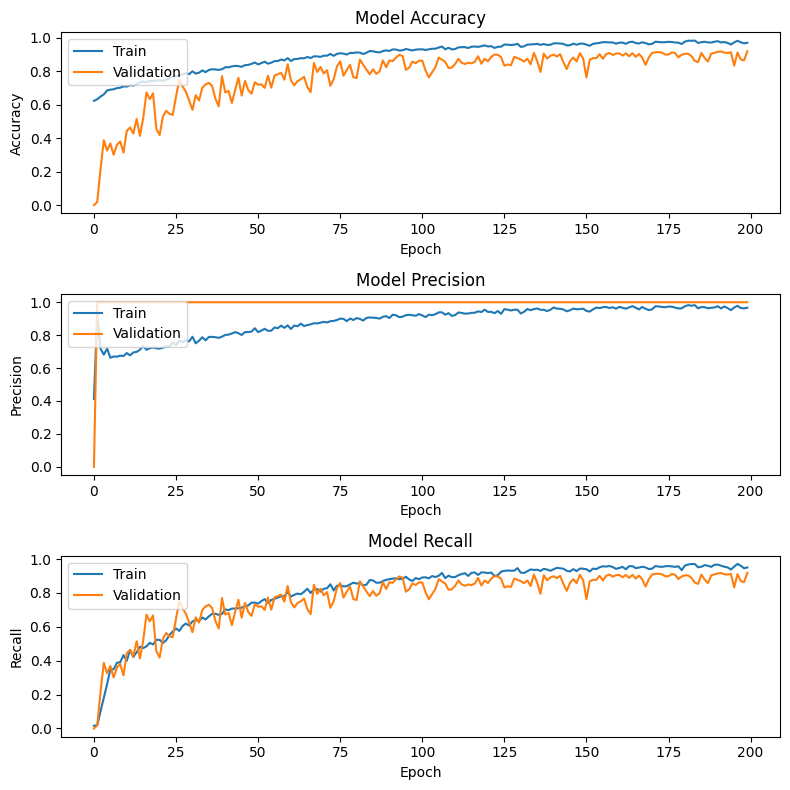

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(3, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(3, 1, 2)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(3, 1, 3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

### Kesimpulan

- **Performa Model**: Model menunjukkan performa yang baik pada data pelatihan, dengan metrik (accuracy, precision, recall) yang meningkat secara konsisten.

- **Generalization**: Meskipun performa pada data validasi cukup baik, fluktuasi pada grafik validasi (terutama pada precision dan recall) menunjukkan bahwa model mungkin mengalami sedikit overfitting pada data pelatihan.

- **Rekomendasi**: Untuk mengurangi fluktuasi dan meningkatkan generalisasi, beberapa langkah dapat dipertimbangkan:
  - Menambahkan regularisasi (seperti Dropout tambahan atau L2 regularization).
  - Menggunakan teknik early stopping untuk menghentikan pelatihan sebelum model mulai overfit.
  - Meningkatkan ukuran dataset atau menggunakan augmentasi data jika memungkinkan.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


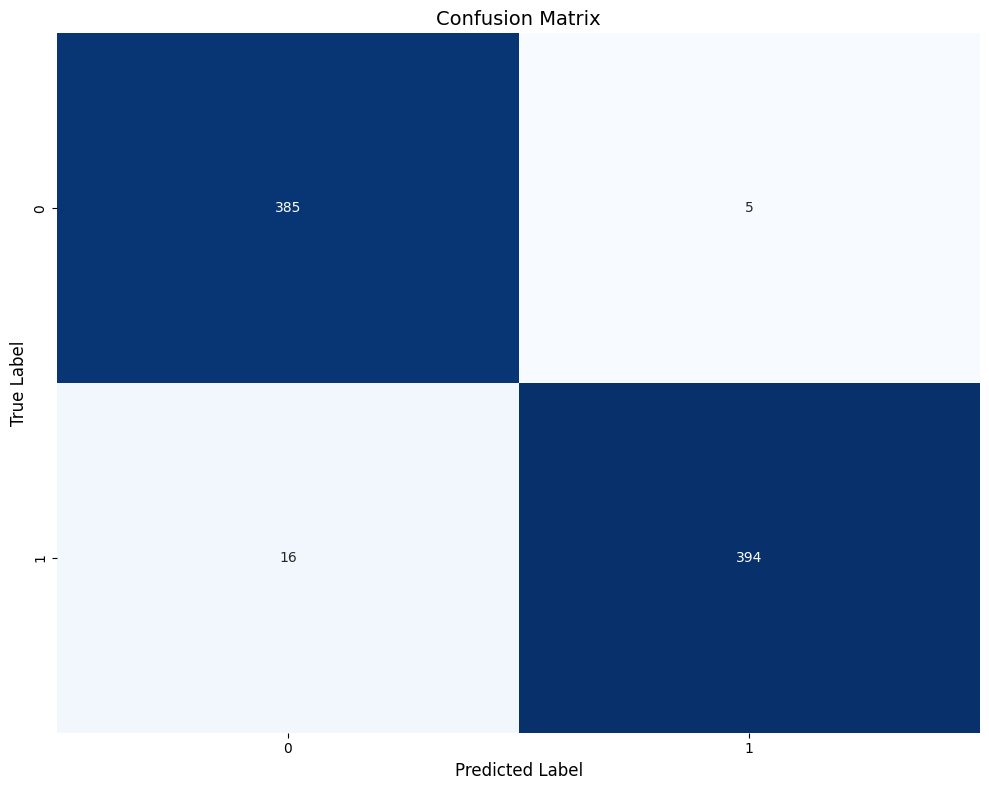

In [42]:
# Import library yang diperlukan
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prediksi pada data test
y_pred_raw = model.predict(x_test)
# Konversi ke label biner (karena output sigmoid)
y_pred = (y_pred_raw > 0.5).astype(int)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Visualisasi confusion matrix dengan anotasi yang jelas
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Tambahkan label yang jelas
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.tight_layout()
plt.show()


Confusion matrix di atas menunjukkan hasil evaluasi model klasifikasi biner. Berikut adalah rincian nilai-nilai dalam matriks:

- **True Positive (TP):** 394  
  Model memprediksi kelas positif (1) dengan benar.

- **True Negative (TN):** 385  
  Model memprediksi kelas negatif (0) dengan benar.

- **False Positive (FP):** 5  
  Model memprediksi kelas positif (1), tetapi sebenarnya kelas negatif (0).

- **False Negative (FN):** 16  
  Model memprediksi kelas negatif (0), tetapi sebenarnya kelas positif (1).
